In [15]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Affichage √©tendu
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [54]:
file_path = '../data/raw/ech_annonces_locations_68.csv'
df = pd.read_csv(file_path, sep=';', parse_dates=['date'], low_memory=False)
# Afficher les 5 premi√®res lignes du DataFrame
df.head()


idannonce type_annonceur typedebien typedetransaction  etage  \
0  immo-facile-52417007             pr          m                 l      0   
1    ag672097-382986683             pr          a                 l      3   
2    ag672097-383464082             pr          a                 l      1   
3    ag680864-383044166             pr          a                 l      0   
4    ag672097-380998252             pr          a                 l      2   

   surface  surface_terrain  nb_pieces  prix_bien  prix_maison  prix_terrain  \
0      116              NaN          5       1250          NaN           NaN   
1       44              NaN          3        600          NaN           NaN   
2       53              NaN          2        498          NaN           NaN   
3       41              NaN          2        460          NaN           NaN   
4       74              NaN          4        695          NaN           NaN   

   mensualiteFinance  balcon  eau  bain dpeL   dpeC  mapCoordonneesLatitude  \
0                  0       0    0     1    D  226.0                47.88299   
1                  0       0    1     0    D  220.0                47.75081   
2                  0       1    1     0    E  272.0                47.75094   
3                  0       0    1     1   VI    NaN                47.75204   
4                  0       0    0     1    D  206.0                47.75075   

   mapCoordonneesLongitude annonce_exclusive  nb_etages  parking  \
0                  7.19650                 0        1.0      NaN   
1                  7.32245                 0        3.0      NaN   
2                  7.32239                 0        NaN      NaN   
3                  7.32135                 0        4.0      NaN   
4                  7.32253                 0        3.0      NaN   

   places_parking   cave exposition ges_class  annee_construction  \
0             NaN   True          0         B              1987.0   
1             NaN    NaN          0         B                 NaN   
2             NaN    NaN          0         E                 NaN   
3             NaN  False          0       NaN                 NaN   
4             NaN    NaN          0         D                 NaN   

   nb_toilettes  nb_terraces videophone porte_digicode  surface_balcon  \
0           2.0          NaN        NaN            NaN             NaN   
1           NaN          NaN        NaN            NaN             NaN   
2           NaN          NaN        NaN            NaN             NaN   
3           1.0          NaN        NaN            NaN             NaN   
4           NaN          NaN        NaN            NaN             NaN   

  ascenseur  nb_logements_copro  charges_copro chauffage_energie  \
0       NaN                 NaN            NaN        √âlectrique   
1       NaN                 NaN            NaN        √âlectrique   
2       NaN                 NaN            NaN               Gaz   
3     False                 NaN            NaN               Gaz   
4       NaN                 NaN            NaN               Gaz   

  chauffage_systeme chauffage_mode categorie_annonceur logement_neuf  \
0         Radiateur     Individuel                   a             n   
1               NaN     Individuel                   a             n   
2               NaN     Individuel                   a             n   
3         Radiateur      Collectif                   a             n   
4               NaN     Individuel                   a             n   

   duree_int typedebien_lite       date  INSEE_COM  IRIS  CODE_IRIS  \
0       15.0               m 2023-04-01      68159     0  681590000   
1        NaN               a 2023-04-01      68224  1201  682241201   
2        NaN               a 2023-04-01      68224  1201  682241201   
3        NaN               a 2023-04-01      68224  1201  682241201   
4       20.0               a 2023-04-01      68224  1201  682241201   

  TYP_IRIS_x TYP_IRIS_y  GRD_QUART  UU2010  REG  

# Etude pr√©liminaire

In [55]:
# Dimensions
print("\nShape:", df.shape)


Shape: (11702, 52)


Types de colonnes :
object            20
float64           16
int64             15
datetime64[ns]     1
Name: count, dtype: int64


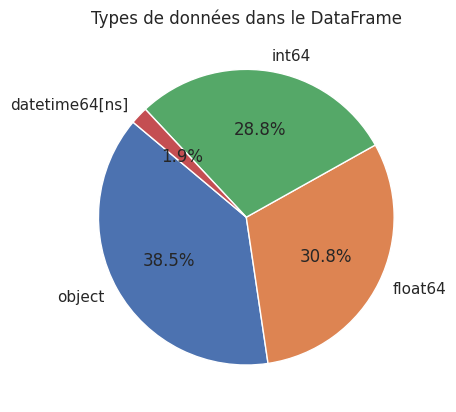

In [56]:
# Types de donn√©es
print("Types de colonnes :")
print(df.dtypes.value_counts())
plt.pie(df.dtypes.value_counts(), labels=df.dtypes.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Types de donn√©es dans le DataFrame')
plt.show()


### Noms des colonnes class√©s par type de donn√©es

**Colonnes de type `int64` :**
- etage: √©tage auquel se trouve le bien
- surface: en m¬≤
- nb_pieces: nombre de pieces (Seules les pi√®ces principales (salon et chambres) rentrent dans le calcul. Les pi√®ces humides (cuisine et salle de bains) et les espaces de moins de 9 m¬≤ en sont exclus)
- prix_bien: prix en ‚Ç¨
- mensualiteFinance: 
- balcon: bool√©en (1=pr√©sence d'un balcon / 0 = pas de balcon)
- eau: bool√©en (1 = eau courante / 0 = pas d'eau)
- bain: 
- INSEE_COM
- IRIS
- CODE_IRIS
- GRD_QUART
- UU2010
- REG
- DEP

**Colonnes de type `float64` :**
- surface_terrain
- dpeC
- mapCoordonneesLatitude
- mapCoordonneesLongitude
- nb_etages
- places_parking
- annee_construction
- nb_toilettes
- nb_terraces
- surface_balcon
- nb_logements_copro
- duree_int

**Colonnes de type `object` :**
- idannonce
- type_annonceur
- typedebien
- typedetransaction
- dpeL
- annonce_exclusive
- cave
- exposition
- ges_class
- videophone
- porte_digicode
- ascenseur
- chauffage_energie
- chauffage_systeme
- chauffage_mode
- categorie_annonceur
- logement_neuf
- typedebien_lite
- TYP_IRIS_x
- TYP_IRIS_y

**Colonne de type `datetime64[ns]` :**
- date

In [57]:
# D√©compte par type (manuel)
print("\nR√©partition des colonnes par type :")
type_summary = {
    "Total": df.shape[1],
    "Num√©riques": df.select_dtypes(include=['int64', 'float64']).shape[1],
    "Cat√©gorielles": df.select_dtypes(include=['object']).shape[1],
    "Bool√©ennes": df.select_dtypes(include=['bool']).shape[1],
    "Datetime": df.select_dtypes(include=['datetime64']).shape[1],
}
print(type_summary)


R√©partition des colonnes par type :
{'Total': 52, 'Num√©riques': 31, 'Cat√©gorielles': 20, 'Bool√©ennes': 0, 'Datetime': 1}


In [64]:
# üåê Pourcentage de valeurs manquantes
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(null_percent[null_percent == 0].keys())

# Visualisation des valeurs manquantes
print("\nPourcentage de valeurs nulles par colonne :")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des valeurs manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')
plt.show()

Index(['dpeL', 'eau', 'bain', 'balcon', 'mensualiteFinance', 'etage',
       'prix_bien', 'surface', 'nb_pieces', 'idannonce', 'type_annonceur',
       'typedebien', 'typedetransaction', 'annonce_exclusive',
       'mapCoordonneesLongitude', 'mapCoordonneesLatitude', 'exposition',
       'categorie_annonceur', 'typedebien_lite', 'date', 'INSEE_COM', 'IRIS',
       'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG',
       'DEP'],
      dtype='object')

Pourcentage de valeurs nulles par colonne :



Colonnes avec 100% de valeurs manquantes :
['prix_maison', 'prix_terrain', 'parking', 'charges_copro']

Dimensions apr√®s nettoyage : (11702, 48)

Types de donn√©es apr√®s nettoyage :
object            20
int64             15
float64           12
datetime64[ns]     1
Name: count, dtype: int64


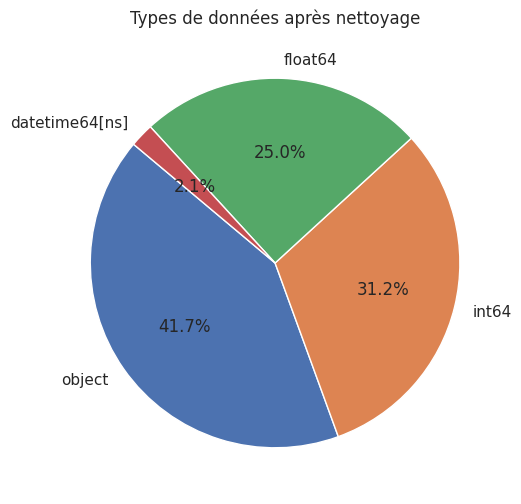

In [59]:
# Filtre des colonnes avec 100% de valeurs manquantes
missing_threshold = 1.0
missing_cols = df.columns[df.isnull().mean() >= missing_threshold]
print("\nColonnes avec 100% de valeurs manquantes :")
print(missing_cols.tolist())
# Suppression des colonnes avec 100% de valeurs manquantes
df_cleaned = df.drop(columns=missing_cols)
# Affichage des dimensions apr√®s nettoyage
print("\nDimensions apr√®s nettoyage :", df_cleaned.shape)
# Affichage des types de donn√©es apr√®s nettoyage
print("\nTypes de donn√©es apr√®s nettoyage :")
print(df_cleaned.dtypes.value_counts())
# Visualisation des types de donn√©es apr√®s nettoyage
plt.figure(figsize=(8, 6))
plt.pie(df_cleaned.dtypes.value_counts(), labels=df_cleaned.dtypes.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Types de donn√©es apr√®s nettoyage')
plt.show()

In [53]:
# Nombre de doublons
print("Nombre de lignes dupliqu√©es :", df_cleaned.duplicated().sum())

Nombre de lignes dupliqu√©es : 0


In [60]:
# Colonnes constantes ou quasi constantes
low_var = [col for col in df_cleaned.columns if df_cleaned[col].nunique() <= 1]
print("Colonnes constantes ou quasi constantes:", low_var)

Colonnes constantes ou quasi constantes: ['mensualiteFinance']


In [61]:
# üîê Cardinalit√© des colonnes cat√©gorielles
print("Top 10 colonnes par cardinalit√© (cat√©gorielles):")
cat_card = df_cleaned.select_dtypes(include='object').nunique().sort_values(ascending=False)
print(cat_card.head(10))

Top 10 colonnes par cardinalit√© (cat√©gorielles):
idannonce            11702
exposition              25
dpeL                    10
ges_class                9
chauffage_systeme        9
chauffage_mode           6
chauffage_energie        5
typedebien               3
typedebien_lite          3
TYP_IRIS_x               3
dtype: int64


In [62]:
# Statistiques descriptives sur les colonnes num√©riques
print("Statistiques descriptives (num√©riques) :")
display(df_cleaned.describe())

Statistiques descriptives (num√©riques) :


etage       surface  surface_terrain     nb_pieces  \
count  11702.000000  11702.000000       507.000000  11702.000000   
mean       1.840711     65.150060       564.100118      2.820629   
min       -2.000000      7.000000         1.710000      1.000000   
25%        0.000000     45.000000       200.000000      2.000000   
50%        1.000000     62.000000       455.000000      3.000000   
75%        2.000000     79.000000       700.000000      3.000000   
max      999.000000    450.000000     10198.000000     13.000000   
std       24.546138     30.798055       776.823114      1.219675   

          prix_bien  mensualiteFinance        balcon           eau  \
count  11702.000000            11702.0  11702.000000  11702.000000   
mean     714.543924                0.0      0.186977      0.286789   
min        1.000000                0.0      0.000000      0.000000   
25%      531.000000                0.0      0.000000      0.000000   
50%      660.000000                0.0      0.000000      0.000000   
75%      820.000000                0.0      0.000000      1.000000   
max     3287.000000                0.0     12.000000      3.000000   
std      286.924335                0.0      0.459904      0.465137   

               bain         dpeC  mapCoordonneesLatitude  \
count  11702.000000  8835.000000            11702.000000   
mean       0.553837   195.815998               47.787841   
min        0.000000     0.000000               43.695670   
25%        0.000000   125.000000               47.637520   
50%        1.000000   188.000000               47.750100   
75%        1.000000   255.000000               47.887640   
max      127.000000   939.000000               49.361760   
std        1.283623   103.608167                0.196353   

       mapCoordonneesLongitude    nb_etages  places_parking  \
count             11702.000000  6631.000000     4082.000000   
mean                  7.358137     3.158649        5.585007   
min                   0.077180     0.000000        0.000000   
25%                   7.318720     2.000000        1.000000   
50%                   7.345930     3.000000        1.000000   
75%                   7.440727     4.000000        2.000000   
max                   7.589750   169.000000      216.000000   
std                   0.231761     3.037997       29.688586   

       annee_construction  nb_toilettes  nb_terraces  surface_balcon  \
count         2275.000000   4791.000000  1565.000000      193.000000   
mean          1973.494945      1.130035     0.530351        8.393782   
min           1001.000000      0.000000     0.000000        1.000000   
25%           1949.000000      1.000000     0.000000        5.000000   
50%           1985.000000      1.000000     1.000000        8.000000   
75%           2009.000000      1.000000     1.000000       10.000000   
max           2023.000000     14.000000     3.000000       31.000000   
std             54.675483      0.448609     0.558478        4.570098   

       nb_logements_copro     duree_int                           date  \
count            9.000000  11448.000000                          11702   
mean            18.666667   -207.466632  2021-07-22 07:04:17.802085376   
min              0.000000  -1125.000000            2019-04-01 00:00:00   
25%              3.000000   -757.000000            2020-09-01 00:00:00   
50%              5.000000     15.000000            2021-08-01 00:00:00   
75%              8.000000     41.000000            2022-07-01 00:00:00   
max            131.000000    504.000000            2023-04-01 00:00:00   
std             42.272923    422.747918                            NaN   

          INSEE_COM          IRIS     CODE_IRIS     GRD_QUART        UU2010  \
count  11702.000000  11702.000000  1.170200e+04  1.170200e+04  11702.000000   
mean   68191.909844    244.231499  6.819193e+08  6.819192e+06  68324.462400   
min     6088.000000      0.000000  6.088010e+07  6.088010e+05    758.000000   
25%    68093.000000      0.00

In [63]:
# Corr√©lation entre variables num√©riques
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corr√©lation")
plt.tight_layout()
plt.show()